### Load and split the dataset
- Load the train data and using all your knowledge of pandas try to explore the different statistical properties of the dataset.
- Separate the features and target and then split the train data into train and validation set.

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [47]:
df = pd.read_csv('C:\\Users\\Admin\\Desktop\\Python - Grey Atom\\Linear Regression\\Lego\\train.csv')
test = pd.read_csv('C:\\Users\\Admin\\Desktop\\Python - Grey Atom\\Linear Regression\\Lego\\test.csv')
df.head()

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country,Id
0,8,155.8800,202,2469,4.7,1,4.9,9,4.7,7,0
1,26,19.9900,9,252,4.8,0,4.6,39,4.6,20,1
2,26,91.6980,56,659,4.6,0,4.6,34,3.9,4,2
3,11,24.3878,1,19,3.0,5,4.0,13,4.0,10,3
4,7,609.9878,84,4016,4.5,1,3.9,34,3.5,10,4


In [48]:
# Dropping Id column as it is not going to add value
df.drop('Id', axis = 1, inplace = True)

In [27]:
df.head()

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country,Id
0,8,155.8800,202,2469,4.7,1,4.9,9,4.7,7,0
1,26,19.9900,9,252,4.8,0,4.6,39,4.6,20,1
2,26,91.6980,56,659,4.6,0,4.6,34,3.9,4,2
3,11,24.3878,1,19,3.0,5,4.0,13,4.0,10,3
4,7,609.9878,84,4016,4.5,1,3.9,34,3.5,10,4


# Data Visualization

- All the features including target variable are continuous. 
- Check out the best plots for plotting between continuous features and try making some inferences from these plots. 

## Visual checking of the assumptions of linear regression

### Linear relationship

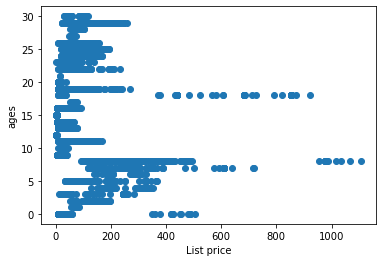

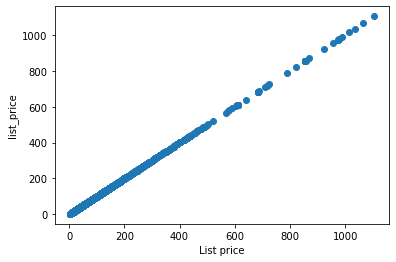

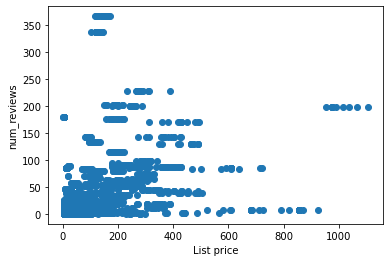

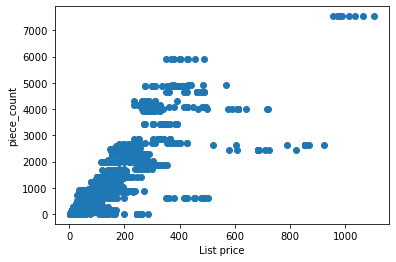

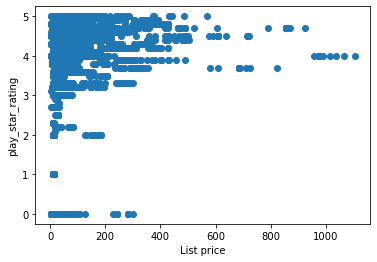

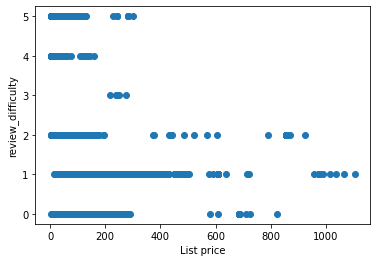

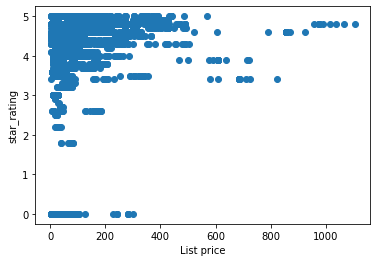

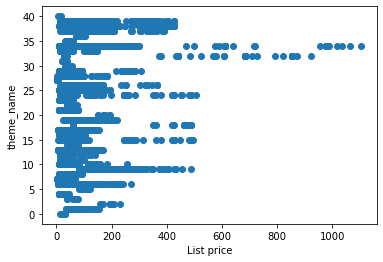

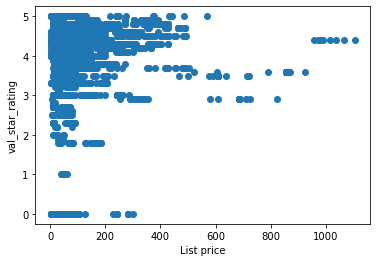

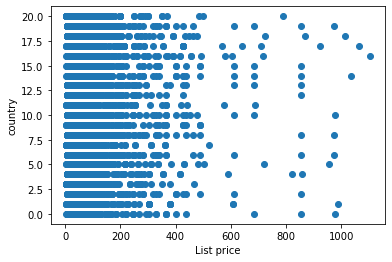

In [5]:
for i in df:
    plt.plot(figsize = [10,12])
    plt.scatter(df['list_price'],df[i])
    plt.xlabel('List price')
    plt.ylabel(i)
    plt.show()

In [6]:
df.columns

Index(['ages', 'list_price', 'num_reviews', 'piece_count', 'play_star_rating',
       'review_difficulty', 'star_rating', 'theme_name', 'val_star_rating',
       'country'],
      dtype='object')

### Bar charts

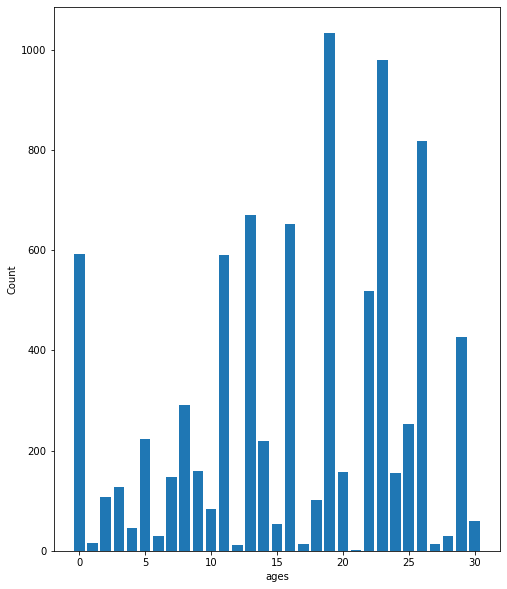

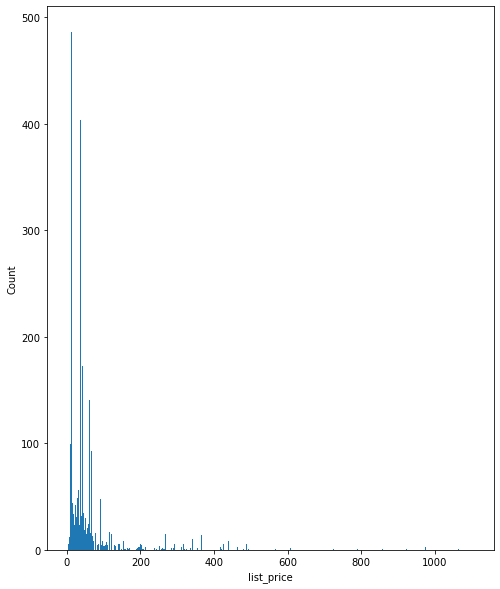

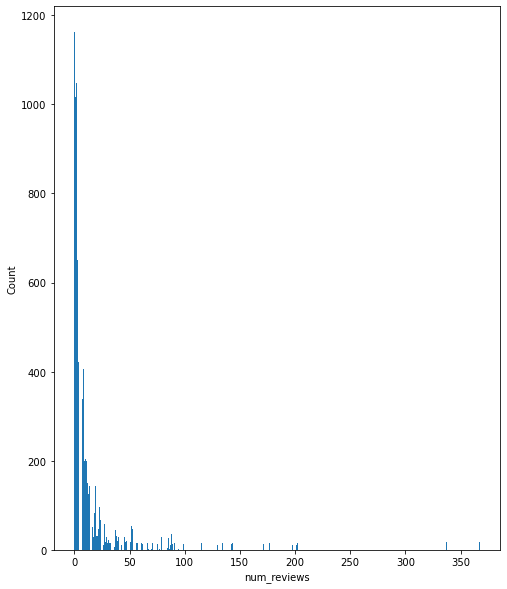

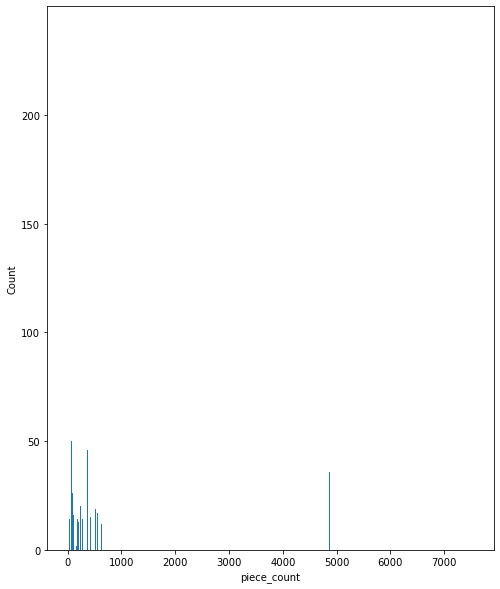

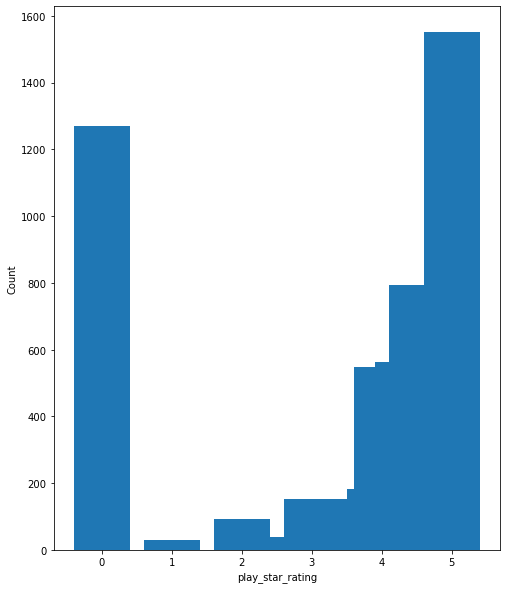

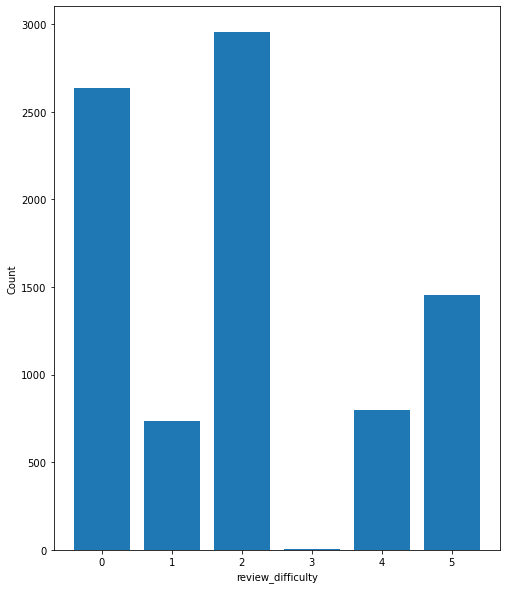

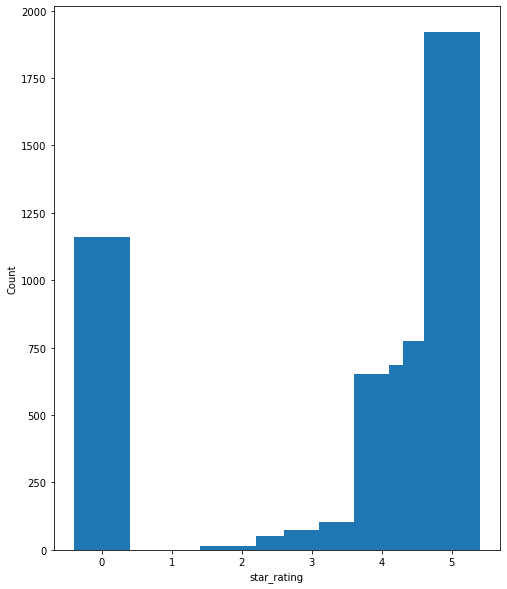

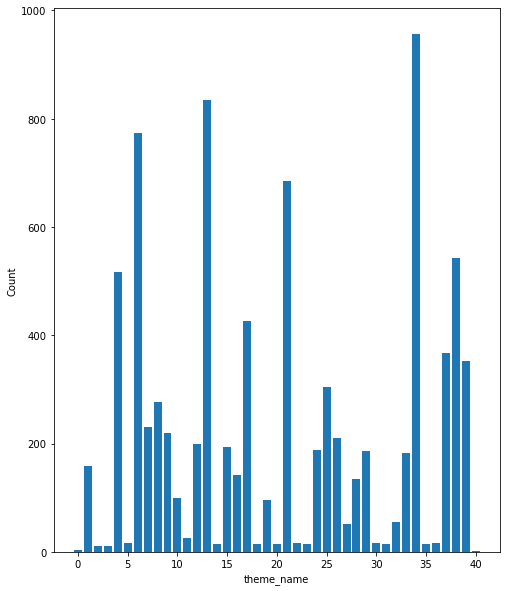

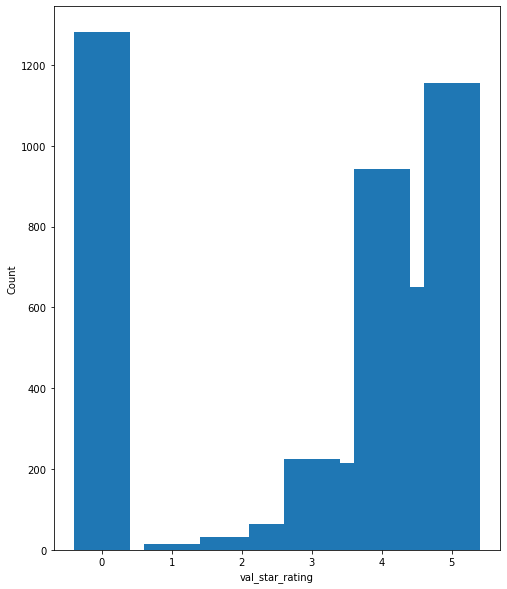

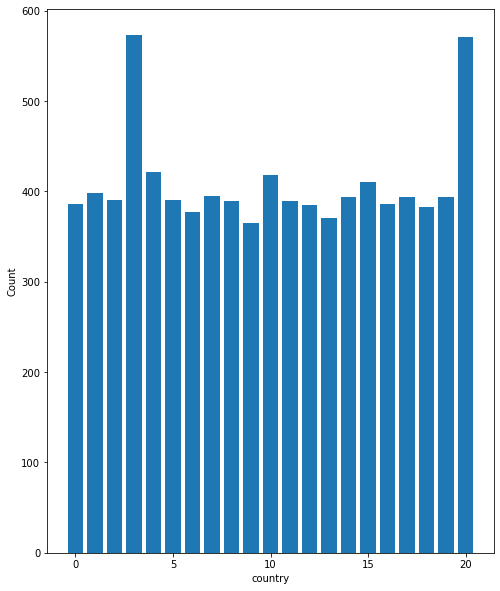

In [7]:
for i in df:
    a = df[i].value_counts()
    b =a.index
    plt.figure(figsize = [8,10])
    plt.bar(b,a)
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.show()

### Multicollinearity check using heatmap

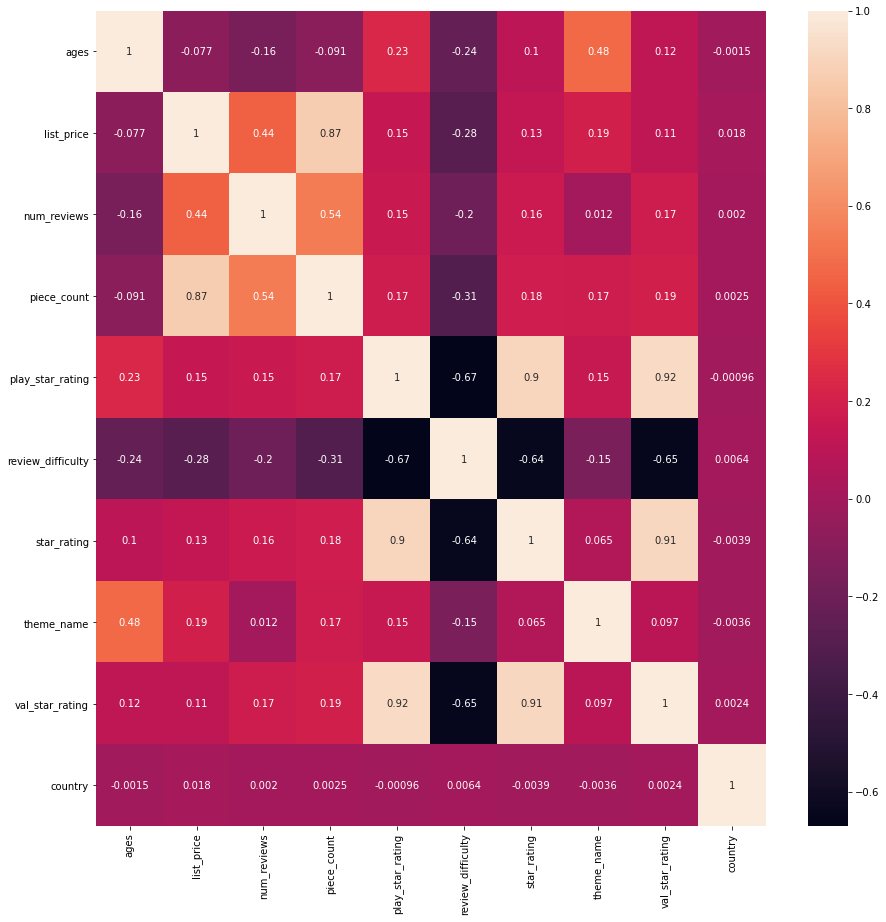

In [8]:
fig = plt.figure(figsize = (15,15))
sns.heatmap(df.corr(), annot = True)
plt.show()

### Using VIF for multicollinearity

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set 
X = df[['ages',
 'list_price',
 'num_reviews',
 'piece_count',
 'play_star_rating',
 'review_difficulty',
 'star_rating',
 'theme_name',
 'val_star_rating',
 'country']] 

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
vif_data

,feature,VIF
0,ages,6.994742
1,list_price,6.459372
2,num_reviews,1.724650
3,piece_count,6.721963
4,play_star_rating,58.036791
5,review_difficulty,2.013621
6,star_rating,44.919916
7,theme_name,5.493204
8,val_star_rating,53.775486
9,country,3.368035


## Feature Selection
- Try selecting suitable threshold and accordingly drop the columns.

In [42]:
list(vif_data[vif_data['VIF'] > 7]['feature'])

['play_star_rating', 'star_rating', 'val_star_rating']

In [43]:
# Eliminating variables based on their VIF scores with threshold of 7
df.drop(['star_rating','val_star_rating'],axis = 1, inplace = True)
df.head()

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,theme_name,country
0,8,155.8800,202,2469,4.7,1,9,7
1,26,19.9900,9,252,4.8,0,39,20
2,26,91.6980,56,659,4.6,0,34,4
3,11,24.3878,1,19,3.0,5,13,10
4,7,609.9878,84,4016,4.5,1,34,10


In [44]:
df.columns

Index(['ages', 'list_price', 'num_reviews', 'piece_count', 'play_star_rating',
       'review_difficulty', 'theme_name', 'country'],
      dtype='object')

In [45]:
# Rechecking VIF

# the independent variables set 
X = df[['ages', 'list_price', 'num_reviews', 'piece_count', 'play_star_rating',
       'review_difficulty', 'theme_name', 'country']] 

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
vif_data

,feature,VIF
0,ages,6.780191
1,list_price,6.118445
2,num_reviews,1.724596
3,piece_count,6.401312
4,play_star_rating,5.328003
5,review_difficulty,1.924271
6,theme_name,5.464964
7,country,3.314030


In [49]:
df.columns

Index(['ages', 'list_price', 'num_reviews', 'piece_count', 'play_star_rating',
       'review_difficulty', 'star_rating', 'theme_name', 'val_star_rating',
       'country'],
      dtype='object')

### Model building

In [62]:
# Creating variables with target and features data
X_train = df.loc[:,['ages', 'num_reviews','val_star_rating', 'piece_count', 'review_difficulty', 'theme_name', 'country']]
y_train = df.loc[:,['list_price']]

# Splitting the dataset into train and test1
from sklearn.model_selection import train_test_split

x_train1, x_test1, y_train1, y_test1 = train_test_split(X_train, y_train, test_size=0.25, random_state =43)

# instantiating Linear regression
lr = LinearRegression()
lr.fit(x_train1,y_train1)

# Predicting on test1 dataset
y_testpred = lr.predict(x_test1)

# Calculating error
print('Mean Squared Error is',mean_squared_error(y_test1, y_testpred))

# R-Square
print('R Square Score is ', r2_score(y_test1, y_testpred))

Mean Squared Error is 1913.9677982541934
R Square Score is  0.7728321257312583


### Residual check!

- Check the distribution of the residual.

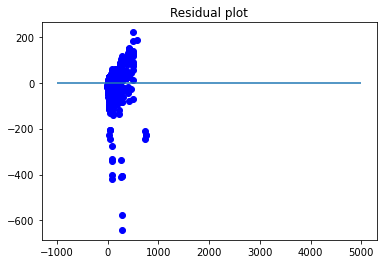

In [64]:
x_plot = plt.scatter(y_testpred, (y_testpred - y_test1), c='b')
plt.hlines(y=0, xmin= -1000, xmax=5000)
plt.title('Residual plot')
plt.show()

### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [65]:
# Preparing the test data for prediction
X_test = test.loc[:,['ages', 'num_reviews','val_star_rating', 'piece_count', 'review_difficulty', 'theme_name', 'country']]

lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [76]:
final = pd.DataFrame(y_pred)
x_id = test.loc[:,'Id']
final['Id'] = x_id
final['list_price'] = y_pred

In [77]:
final.to_csv(r'C:\Users\Admin\Desktop\Python - Grey Atom\Linear Regression\Lego\lego.csv', index=False)